In [11]:
# Usada para trabalhar com os dados
import pandas as pd

# Usada para trabalhar com datas
import datetime as dt
from datetime import timedelta

# Usada para extrair os dados do site
from bs4 import BeautifulSoup
import requests

# Bibliote para pausar o codigo
import time 

# Ignora as avisos
import warnings
warnings.filterwarnings('ignore')

# Seta configuracoes do pandas para visualizar os dados completos
pd.options.display.max_columns = 10000
pd.options.display.max_colwidth = 10000
pd.options.display.max_rows = 100000

In [12]:
# URL da página
url = 'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view'

# Fazendo a solicitação GET para a página
response = requests.get(url)

# Verifica se a solicitação foi bem sucedida
if response.status_code == 200:
    # Analisando o conteúdo HTML da página
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrando a tabela desejada
    table = soup.find('table', {'class': 'dxgvTable'})

    if table:
        # Extraindo os dados da tabela
        rows = table.find_all('tr')
        # Lista vazia que usaremos para criar o dataframe
        data = []
        # Iterando sobre as linhas e imprimindo os dados
        for row in rows:
            # Extrai as células da linha
            cells = row.find_all(['td', 'th'])
            
            # Se houver células na linha
            if cells:
                # Extrai o texto de cada célula e imprime
                row_data = [cell.get_text(strip=True) for cell in cells]

                # Adiciona os valores em uma lista
                data.append(row_data)
            
    else:
        print("Tabela não encontrada na página.")
else:
    print("Falha ao acessar a página.")


In [13]:
# Visualizando a lista
data

[['Data',
  'Data',
  '',
  'Preço - petróleo bruto - Brent (FOB)',
  'Preço - petróleo bruto - Brent (FOB)',
  ''],
 ['Data', ''],
 ['Preço - petróleo bruto - Brent (FOB)', ''],
 ['13/05/2024', '83,18'],
 ['10/05/2024', '83,39'],
 ['09/05/2024', '83,27'],
 ['08/05/2024', '82,44'],
 ['07/05/2024', '82,69'],
 ['03/05/2024', '83,60'],
 ['02/05/2024', '84,81'],
 ['01/05/2024', '83,55'],
 ['30/04/2024', '88,23'],
 ['29/04/2024', '88,44'],
 ['26/04/2024', '89,95'],
 ['25/04/2024', '88,10'],
 ['24/04/2024', '89,02'],
 ['23/04/2024', '88,29'],
 ['22/04/2024', '87,30'],
 ['19/04/2024', '87,96'],
 ['18/04/2024', '88,34'],
 ['17/04/2024', '89,54'],
 ['16/04/2024', '91,29'],
 ['15/04/2024', '90,84'],
 ['12/04/2024', '93,12'],
 ['11/04/2024', '91,49'],
 ['10/04/2024', '91,57'],
 ['09/04/2024', '92,13'],
 ['08/04/2024', '91,73'],
 ['05/04/2024', '92,81'],
 ['04/04/2024', '90,32'],
 ['03/04/2024', '90,60'],
 ['02/04/2024', '87,63'],
 ['28/03/2024', '86,17'],
 ['27/03/2024', '84,94'],
 ['26/03/2024',

In [14]:
# Transformando em dataframe a partir do registro que queremos guardar (tira sujeira)
petroleo = pd.DataFrame(data[3:], columns=['data', 'preço'])

In [15]:
# Printando para ver como ficou a base
petroleo.head()

,data,preço
0,13/05/2024,"83,18"
1,10/05/2024,"83,39"
2,09/05/2024,"83,27"
3,08/05/2024,"82,44"
4,07/05/2024,"82,69"


In [16]:
# Convertendo o campo de data para o formato de data
petroleo.data = pd.to_datetime(petroleo.data, format='%d/%m/%Y')

# Olhando a data minima da base para a analise
petroleo.data.min()

Timestamp('1987-05-20 00:00:00')

In [17]:
# Exportando primeira extracao para csv
petroleo.to_csv('dados_petrole.csv', index=False)

In [18]:
# Agora vamos extrair alguns dados economicos para agregar nas analises

# Importando biblioteca BACEN (banco central)
from bcb import currency
from bcb import sgs

# Extraindo os dados da SELIC e IPCA a partir da data que temos petroleo 
# (pode ser que nao retorne todo o periodo)
selic = sgs.get({'selic': 432}, start = '1987-05-20').reset_index()
ipca = sgs.get({'ipca': 433}, start = '1987-05-20').reset_index()

# Visualizando ambas tabelas
selic.head(), ipca.head()

(        Date  selic
 0 1999-03-05   45.0
 1 1999-03-06   45.0
 2 1999-03-07   45.0
 3 1999-03-08   45.0
 4 1999-03-09   45.0,
         Date   ipca
 0 1987-05-01  21.45
 1 1987-06-01  19.71
 2 1987-07-01   9.21
 3 1987-08-01   4.87
 4 1987-09-01   7.78)

In [19]:
# Convertendo o campo de data para o formato de data
selic.Date = pd.to_datetime(selic.Date, format='%d/%m/%Y')

# Olhando a data minima da base para a analise
selic.Date.min()

Timestamp('1999-03-05 00:00:00')

In [20]:
# Convertendo o campo de data para o formato de data
ipca.Date = pd.to_datetime(ipca.Date, format='%d/%m/%Y')

# Olhando a data minima da base para a analise
ipca.Date.min()

Timestamp('1987-05-01 00:00:00')

In [21]:
# Extraindo o preço do dolar
dolar = currency.get('USD', start='1987-05-20', end=dt.datetime.now()).reset_index()

In [22]:
# Convertendo o campo de data para o formato de data
dolar.Date = pd.to_datetime(dolar.Date, format='%d/%m/%Y')

# Olhando a data minima da base para a analise
dolar.Date.min()

Timestamp('1987-05-20 00:00:00')

In [23]:
# Exportando todos os dados
selic.to_csv('dados_selic.csv', index=False)
ipca.to_csv('dados_ipca.csv', index=False)
dolar.to_csv('dados_dolar.csv', index=False)

In [24]:
petroleo.columns = ['Date','petroleo']

In [25]:
# Unindo todos os dados para podermos comparar
df_total = petroleo.merge(
    selic,
    how='left',
    on=['Date']
)

In [26]:
# Unindo todos os dados para podermos comparar
df_total = df_total.merge(
    ipca,
    how='left',
    on=['Date']
)

In [27]:
dolar.columns = ['Date', 'dolar']
# Unindo todos os dados para podermos comparar
df_total = df_total.merge(
    dolar,
    how='left',
    on=['Date']
)

In [28]:
# Visualizando o df total
# Unindo todos os dados para podermos comparar
df_total.head()

,Date,petroleo,selic,ipca,dolar
0,2024-05-13,"83,18",10.50,NaN,5.1412
1,2024-05-10,"83,39",10.50,NaN,5.1464
2,2024-05-09,"83,27",10.50,NaN,5.1577
3,2024-05-08,"82,44",10.75,NaN,5.0887
4,2024-05-07,"82,69",10.75,NaN,5.0610


In [29]:
# Extraindo os dados da inflacao dos estados unidos
# Série de dados de inflação para todos os itens, todos os consumidores, todas as áreas urbanas dos EUA
series_id = 'CUUR0000SA0'

# URL base da API do BLS
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# Parâmetros da solicitação
data = {
    'seriesid': [series_id],
    'startyear': '2005',
    'endyear': '2006' 
}

# Fazendo a solicitação para a API do BLS
response = requests.post(base_url, json=data)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Convertendo a resposta JSON em um DataFrame do Pandas
    json_data = response.json()
    series_data = json_data['Results']['series'][0]['data']
    df = pd.DataFrame(series_data)
    
    # Renomeando colunas
    df.rename(columns={'year': 'Year', 'period': 'Month', 'value': 'Inflation'}, inplace=True)
    
    # Combinando Year e Month e convertendo para formato de data
    df['Date'] = pd.to_datetime(df['Year'] + df['Month'], format='%YM%m')
    
    # Selecionando as colunas necessárias
    df = df[['Date', 'Inflation']]
    
    # Exibindo os primeiros registros do DataFrame
    print(df.head())
else:
    print("Falha ao acessar a API do BLS.")

        Date Inflation
0 2006-12-01     201.8
1 2006-11-01     201.5
2 2006-10-01     201.8
3 2006-09-01     202.9
4 2006-08-01     203.9


In [30]:
# Printando min e max de cada processamento (so pega dados de 10 em 10 anos)
df.Date.min(), df.Date.max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2006-12-01 00:00:00'))

In [31]:
# Exportando inflacao do USA de cada processamento
df.to_csv('dados_inflacao_usa_2005_2006.csv', index=False)

In [32]:
# Empilhando todos os processamentos
arquivos = ['dados_inflacao_usa_1987_1996.csv',
'dados_inflacao_usa_1996_2005.csv',
'dados_inflacao_usa_2005_2006.csv', 
'dados_inflacao_usa_2007_2016.csv', 
'dados_inflacao_usa_2016_2024.csv']

# Cria df vazio que contera todas as informacoes
inflation = pd.DataFrame([], columns=['Date', 'Inflation'])

# Fazendo um loop que vai ler todos os arquivos e empilhar
for file in arquivos:
    # Le arquivo temporario
    df_temp = pd.read_csv(file)

    # Empilha arquivo temporario no total
    inflation = pd.concat([inflation, df_temp])

inflation.head()

,Date,Inflation
0,1996-12-01,158.6
1,1996-11-01,158.6
2,1996-10-01,158.3
3,1996-09-01,157.8
4,1996-08-01,157.3


In [33]:
# Convertendo campo para data
inflation.Date = pd.to_datetime(inflation.Date, format='%Y-%m-%d')

In [34]:
# Incluindo na base estes dados 
df_total = df_total.merge(
    inflation,
    how='left',
    on='Date'
)

In [35]:
# exportando o arquivo final
df_total.to_csv('base_final.csv', index=False)

In [42]:
df_total.petroleo = df_total.petroleo.str.replace(',','.').astype(float)

<AxesSubplot:>

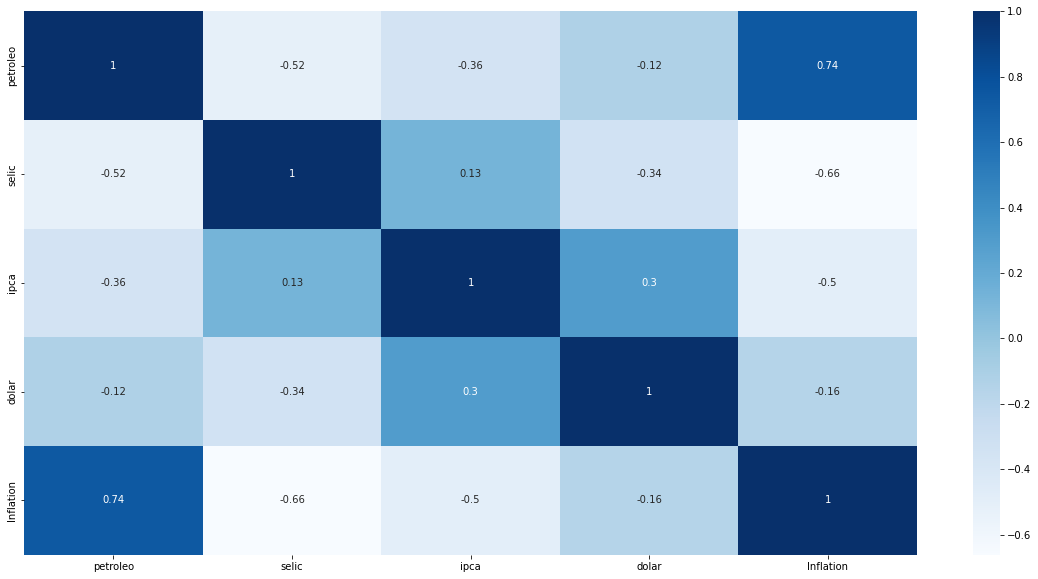

In [43]:
# Criando uma matriz de correlacao, para analisar as variaveis
import matplotlib.pyplot as plt
import seaborn as sns


corr = df_total.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True) 